In [1]:

import argparse
import json
from PIL import Image
import numpy as np
import torch
import torch.nn.functional as F
import random
import os

from diffusers import DDIMScheduler

from models.p2p.inversion import DirectInversion
from models.masactrl.diffuser_utils import MasaCtrlPipeline
from models.masactrl.masactrl_utils import AttentionBase
from models.masactrl.masactrl_utils import regiter_attention_editor_diffusers
from models.masactrl.masactrl import MutualSelfAttentionControl
from utils.utils import load_512,txt_draw

from torchvision.io import read_image
from run_editing_masactrl import MasaCtrlMaskAutoEditor



def mask_decode(encoded_mask,image_shape=[512,512]):
    length=image_shape[0]*image_shape[1]
    mask_array=np.zeros((length,))
    
    for i in range(0,len(encoded_mask),2):
        splice_len=min(encoded_mask[i+1],length-encoded_mask[i])
        for j in range(splice_len):
            mask_array[encoded_mask[i]+j]=1
            
    mask_array=mask_array.reshape(image_shape[0], image_shape[1])
    # to avoid annotation errors in boundary
    mask_array[0,:]=1
    mask_array[-1,:]=1
    mask_array[:,0]=1
    mask_array[:,-1]=1
            
    return mask_array


def setup_seed(seed=1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


/home/jimmyliu/miniconda3/envs/masa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
'''
image_path="scripts/example_cake.jpg"
prompt_src="a round cake with orange frosting on a wooden plate"
prompt_tar="a square cake with orange frosting on a wooden plate"
'''
image_path="../dataset/PIE/annotation_images/0_random_140/000000000011.jpg"
prompt_src="a colorful bird standing on a branch"
prompt_tar="a red bird standing on a branch"


In [3]:
masactrl_editor=MasaCtrlMaskAutoEditor(["ddim+masactrl","directinversion+masactrl"], torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') )

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/home/jimmyliu/miniconda3/envs/masa/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:107: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.15.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offs

In [4]:
show_image=[]
first=True

In [5]:
# ddim+masactrl


for i in range(4,49,5):


    edited_image = masactrl_editor("directinversion+masactrl",
                        image_path=image_path,
                        prompt_src=prompt_src,
                        prompt_tar=prompt_tar,
                        guidance_scale=7.5,
                        step=i,
                        layper=10
                        )
    
    edited_image=np.array(edited_image)[:,512*3:,:]

    if first:
        first=False
        show_image=edited_image.copy()
    else:
        show_image=np.concatenate((show_image,edited_image),axis=1)




/home/jimmyliu/miniconda3/envs/masa/lib/python3.9/site-packages/diffusers/models/unet_2d_condition.py:452: FutureWarning: Accessing `in_channels` directly via unet.in_channels is deprecated. Please use `unet.config.in_channels` instead
  deprecate(


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]


MasaCtrl at denoising steps:  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:19<00:00,  2.53it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.54it/s]


MasaCtrl at denoising steps:  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.43it/s]


MasaCtrl at denoising steps:  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:18<00:00,  2.65it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]


MasaCtrl at denoising steps:  [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:18<00:00,  2.76it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.55it/s]


MasaCtrl at denoising steps:  [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:17<00:00,  2.88it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.54it/s]


MasaCtrl at denoising steps:  [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:16<00:00,  2.98it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.55it/s]


MasaCtrl at denoising steps:  [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:16<00:00,  3.10it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.57it/s]


MasaCtrl at denoising steps:  [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


input text embeddings : torch.Size([1, 77, 768])
latents shape:  torch.Size([1, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:07<00:00,  6.57it/s]


MasaCtrl at denoising steps:  [44, 45, 46, 47, 48, 49]
MasaCtrl at U-Net layers:  [10, 11, 12, 13, 14, 15]
Using MutualSelfAttentionControlMaskAuto
input text embeddings : torch.Size([2, 77, 768])
latents shape:  torch.Size([2, 4, 64, 64])


DDIM Sampler: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


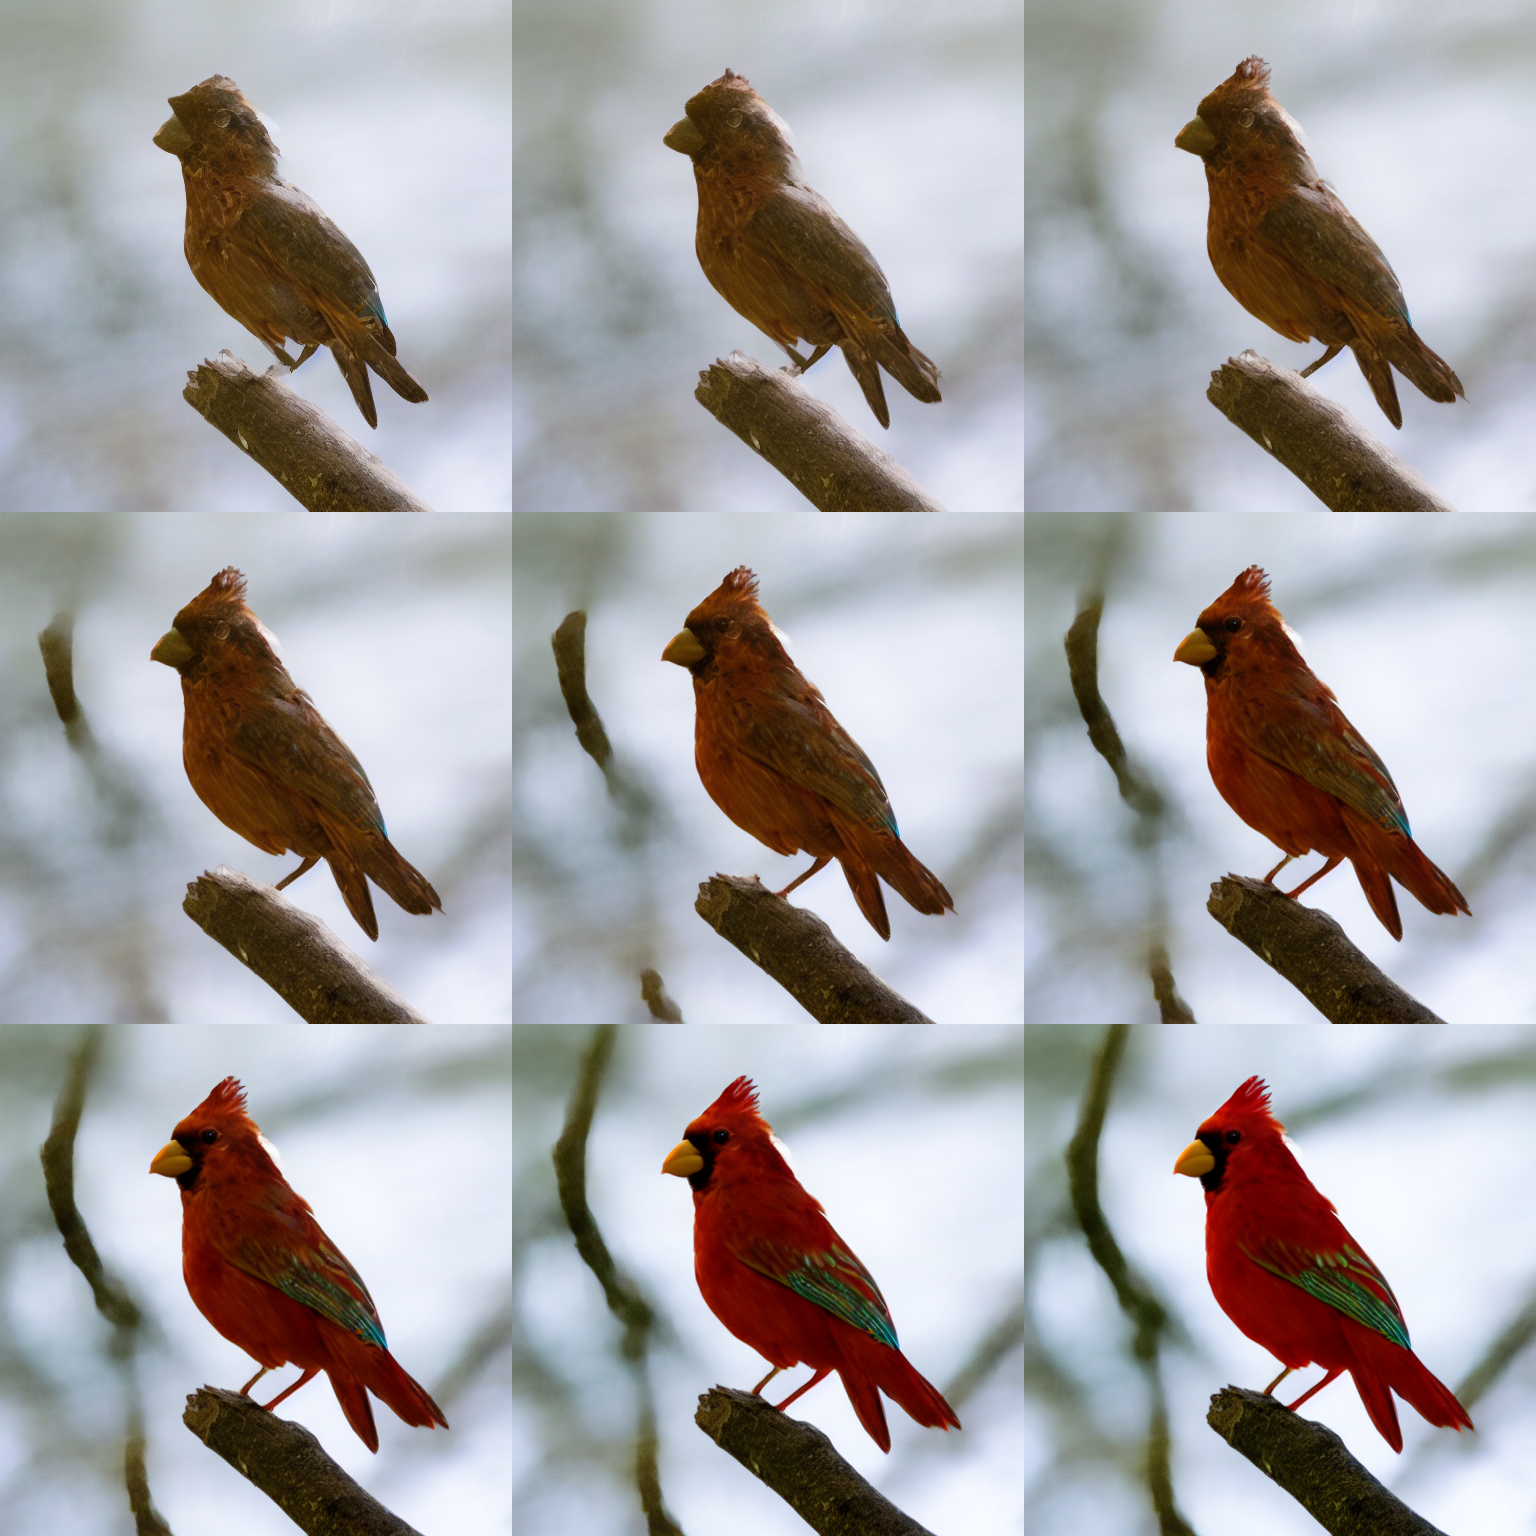

In [6]:
final_show_image=np.concatenate((show_image[:,:512*3,:],show_image[:,512*3:512*6,:]),axis=0)
final_show_image=np.concatenate((final_show_image,show_image[:,512*6:,:]),axis=0)
display(Image.fromarray(final_show_image))